# Efficient Euclidean Distance

Often times when working in two or three dimensions we find the need to compute the distance between two or more objects, points, or individuals. This could be a particle system where collisions are determined by the distance between particles, or computing all the distances between multiple places on a map when doing spatial interpolation (e.g. kriging), or when simulating the contact or interaction of individuals or live organisms.

Wtih two data points things are straight forward, but when the number of data points is large we need an efficient computation method. This exercise will show you the real power of matrix operations behind Numpy to make massive computations in a breeze.


In [22]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import time


In [61]:
# Define a set of points in the cartesian place
xmin = 0
xmax = 100
ymin = 0
ymax =100
N = 5000

np.random.seed(5) # for reproducibility
x = np.random.uniform(xmin,xmax,N)
y = np.random.uniform(ymin,ymax,N)


In [62]:
# Generate point labels
#labels = [str(i) for i in range(N)]
#for i in range(N):
#    plt.annotate(labels[i], (x[i]+2, y[i]+1))
    

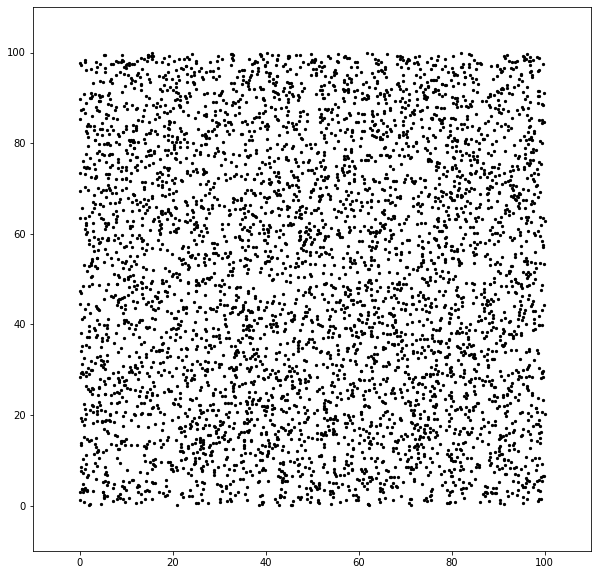

In [74]:
# Represent point on the plane
plt.figure(figsize=(10,10))
plt.scatter(x,y, s=5, marker='o', facecolor='k')

plt.xlim(-10,110)
plt.ylim(-10,110)
plt.show()


In [69]:
def edist(x,y):
    """Compute euclidean distance for all pairs of points in x and y using
    Kronecker product.
    Inputs:
        -x: list of x-coordiantes (numpy array)
        -y: list of y-coordiantes (numpy array)
        
    Outputs:
        -E: resulting matrix of euclidean distances
    """
    df = np.kron(np.ones(N),[x,y]) - np.kron([x,y],np.ones(N)) # Compute differences in each dimension using Kronecker product.
    E = np.sqrt(df[0]**2 + df[1]**2) # Compute Euclidean distance.
    E = np.reshape(E,[N,N])
    return E


In [70]:
# Compute Euclidean distance for all possible combinations
tic = time.perf_counter()
E = edist(x,y)
toc = time.perf_counter()

print(toc-tic, 'seconds')


1.8902410800001235 seconds


In [72]:
# Display part of the distance matrix
np.round(E[0:10,0:10])


array([[ 0., 65., 17., 73., 50., 56., 56., 49., 53., 13.],
       [65.,  0., 68., 25., 55., 50., 16., 50., 76., 69.],
       [17., 68.,  0., 81., 38., 70., 56., 38., 37.,  5.],
       [73., 25., 81.,  0., 77., 36., 40., 72., 97., 81.],
       [50., 55., 38., 77.,  0., 83., 39.,  5., 22., 42.],
       [56., 50., 70., 36., 83.,  0., 57., 79., 98., 67.],
       [56., 16., 56., 40., 39., 57.,  0., 34., 60., 58.],
       [49., 50., 38., 72.,  5., 79., 34.,  0., 26., 42.],
       [53., 76., 37., 97., 22., 98., 60., 26.,  0., 42.],
       [13., 69.,  5., 81., 42., 67., 58., 42., 42.,  0.]])

In [73]:
# Display upper triangular matrix
E_upper = np.triu(np.round(E)) # rounded for display purposes only
np.round(E_upper[0:10,0:10])


array([[ 0., 65., 17., 73., 50., 56., 56., 49., 53., 13.],
       [ 0.,  0., 68., 25., 55., 50., 16., 50., 76., 69.],
       [ 0.,  0.,  0., 81., 38., 70., 56., 38., 37.,  5.],
       [ 0.,  0.,  0.,  0., 77., 36., 40., 72., 97., 81.],
       [ 0.,  0.,  0.,  0.,  0., 83., 39.,  5., 22., 42.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 57., 79., 98., 67.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 34., 60., 58.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26., 42.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 42.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])